### IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
# READING THE DATA
df = pd.read_csv("http://bit.ly/w-data")

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

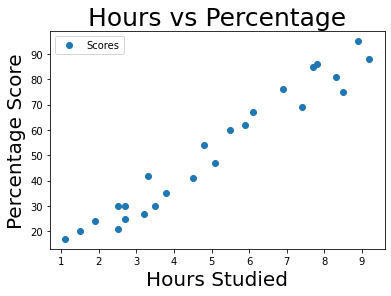

In [14]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage',fontsize=25)  
plt.xlabel('Hours Studied',fontsize=20)  
plt.ylabel('Percentage Score',fontsize=20)   
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

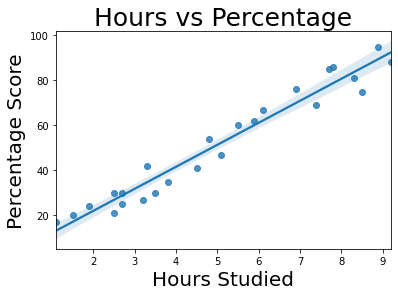

In [52]:
sns.regplot(x='Hours',y='Scores',data=df)
plt.title('Hours vs Percentage',fontsize=25)  
plt.xlabel('Hours Studied',fontsize=20)  
plt.ylabel('Percentage Score',fontsize=20)   
plt.show()

# PREPARING THE DATA

In [30]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [31]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [32]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [64]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(20, 1) (20,) (5, 1) (5,)


# TRAINING THE ALGORITHM

In [65]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()
model.fit(x_train,y_train)
print("Training complete.")

Training complete.


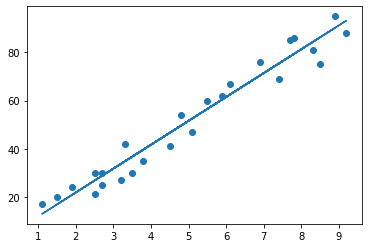

In [66]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# MAKING PREDICTIONS

In [67]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [68]:
y_pred = model.predict(x_test)

In [69]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [70]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### MAKING PREDICTIONS FOR SCORE IF A STUDENT STUDIES 9.25 hrs in a day

In [71]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = model.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


# EVALUATING THE MODEL

In [72]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
